<a href="https://colab.research.google.com/github/Naseem-Ananzeh/Ml2_Final_Project/blob/main/Mall_dataset_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Libraries**



In [66]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#**Loading The Data**

In [67]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = "Mall_Customers.csv"

Mall_c = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "vjchoudhary7/customer-segmentation-tutorial-in-python",
  file_path)

<ipython-input-67-3ce592fc84cd>:6: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  Mall_c = kagglehub.load_dataset(


In [68]:
Mall_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [69]:
Mall_c.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [70]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [71]:
Mall_c=Mall_c.drop(['CustomerID'],axis=1)

In [72]:
Mall_c['Gender'] = Mall_c['Gender'].map({'Male': 0, 'Female': 1})

In [73]:
x_m = Mall_c[['Age','Gender','Annual Income (k$)', 'Spending Score (1-100)']]

In [74]:
scaler = StandardScaler()
x_scaled_m = scaler.fit_transform(x_m)

In [75]:
pca = PCA()
x_pca_m = pca.fit_transform(x_scaled_m)

In [76]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

n_components = np.argmax(cumulative_variance_ratio >= 0.90) + 1

print(f"the minimum number of components preserving 90–95% variance: {n_components}")

pca_reduced = PCA(n_components=n_components)
x_pca_reduced = pca.fit_transform(x_scaled_m)

the minimum number of components preserving 90–95% variance: 4


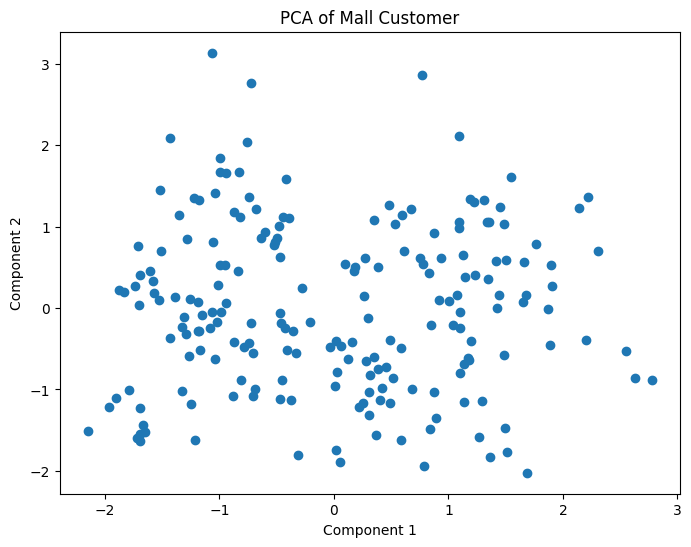

In [77]:
plt.figure(figsize=(8, 6))
plt.scatter(x_pca_m[:, 0], x_pca_m[:, 1])
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('PCA of Mall Customer')
plt.show()

In [78]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42)
Mall_c['cluster'] = kmeans.fit_predict(x_pca_reduced)
#t-SNE before clustering
tsne = TSNE(n_components=2, random_state=42)
x_tsne_before = tsne.fit_transform(x_scaled_m)

#t-SNE after clustering
x_tsne_after = tsne.fit_transform(x_pca_reduced)

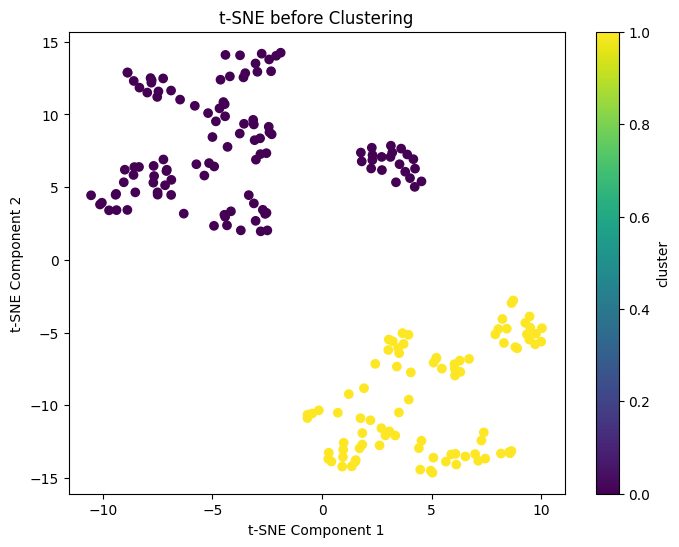

In [79]:
plt.figure(figsize=(8, 6))
plt.scatter(x_tsne_before[:, 0], x_tsne_before[:, 1], c=Mall_c['cluster'])
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE before Clustering')
plt.colorbar(label='cluster')
plt.show()

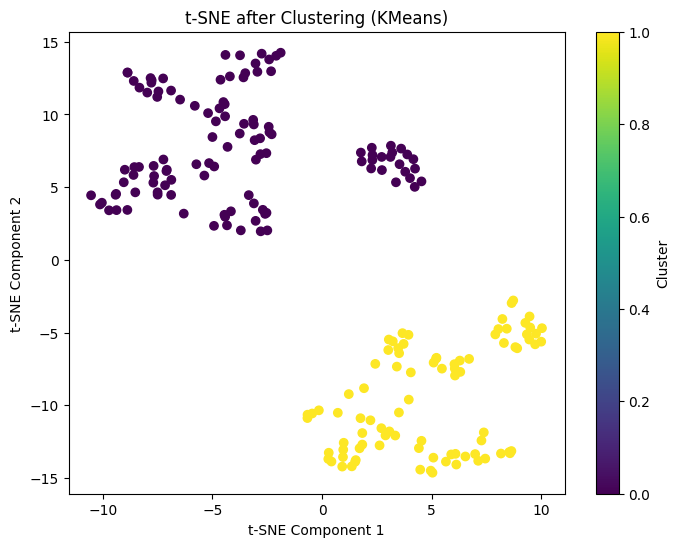

In [80]:
plt.figure(figsize=(8, 6))
plt.scatter(x_tsne_after[:, 0], x_tsne_after[:, 1], c=Mall_c['cluster'])
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE after Clustering (KMeans)')
plt.colorbar(label='Cluster')
plt.show()

In [81]:
kmeans=KMeans(n_clusters=5,n_init=10,random_state=42)
y_pred=kmeans.fit_predict(x_pca_reduced)
y_pred

array([3, 3, 3, 3, 3, 3, 2, 3, 4, 3, 4, 3, 2, 3, 4, 3, 2, 3, 4, 3, 3, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 4, 3, 4, 3, 2, 3, 2, 3, 2, 3, 2, 3, 4, 3,
       2, 3, 2, 3, 3, 3, 2, 3, 3, 4, 2, 4, 2, 4, 3, 4, 4, 3, 2, 2, 4, 3,
       2, 2, 3, 3, 4, 2, 2, 2, 4, 3, 2, 4, 3, 2, 4, 4, 4, 2, 3, 4, 2, 3,
       3, 2, 2, 3, 4, 2, 2, 3, 2, 3, 4, 3, 3, 2, 4, 3, 4, 3, 2, 4, 4, 4,
       4, 3, 2, 3, 3, 3, 2, 2, 2, 2, 3, 2, 2, 0, 1, 0, 4, 0, 4, 0, 4, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 4, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 4, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       4, 0, 4, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0], dtype=int32)

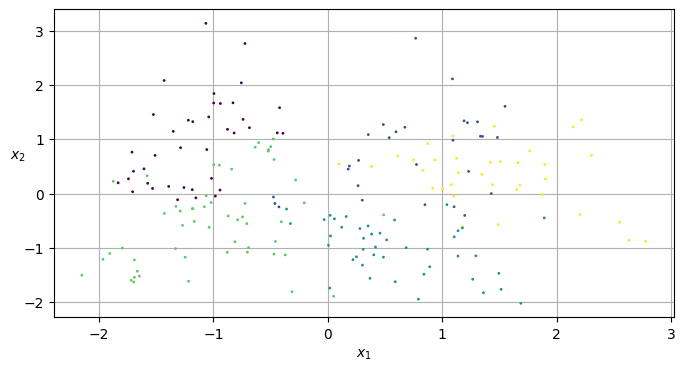

In [82]:
def plot_clusters(x_pca_reduced, y=y_pred):
    plt.scatter(x_pca_reduced[:, 0], x_pca_reduced[:, 1], c=y, s=1)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

plt.figure(figsize=(8, 4))
plot_clusters(x_pca_reduced)
plt.gca().set_axisbelow(True)
plt.grid()
#save_fig("blobs_plot")
plt.show()

In [83]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(x_pca_reduced)


DBSCAN()

In [84]:
dbscan.labels_

array([-1, -1, -1,  0, -1,  0, -1, -1, -1,  0, -1, -1, -1,  0, -1,  1, -1,
        1, -1, -1, -1,  1, -1,  1, -1,  1, -1, -1, -1, -1, -1,  0, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  3, -1, -1,  2,  3,  3,  3,  2,
       -1,  3,  4,  2,  4,  2,  4,  3,  4,  4, -1, -1,  2,  4, -1,  2, -1,
       -1,  3,  4,  2, -1,  2,  4,  5,  2, -1,  3,  2,  4, -1,  4,  2,  3,
        4,  2,  3, -1,  2, -1,  5,  4, -1,  3,  5,  2,  3,  4,  5,  3,  2,
        6,  5,  4,  3, -1,  4,  6,  6,  6,  3, -1,  5,  3,  3, -1,  2,  2,
        2,  5, -1, -1,  8, -1,  7, -1,  8, -1, -1, -1, -1,  3,  7, -1,  7,
       -1, -1, -1,  7, -1,  8, -1,  7, -1, -1, -1,  7, -1,  8, -1,  8, -1,
        7, -1,  7, -1,  7, -1,  7, -1,  7, -1,  7, -1,  7, -1,  7, -1, -1,
       -1, -1, -1,  8, -1,  7, -1, -1, -1, -1, -1,  7, -1,  7, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [85]:
dbscan.components_

array([[-1.64607339, -1.52251259, -0.61040994, -0.02340163],
       [-1.01895051, -0.16624751, -1.97897968, -0.09616931],
       [ 0.21954068, -1.21995587,  0.22596299,  0.69932822],
       [-0.70259233, -1.08085693,  0.06636706, -0.68843932],
       [-0.47051916, -1.11577393,  0.11044322, -0.7239331 ],
       [-0.37178251, -1.13065684,  0.12800946, -0.62233177],
       [ 0.24970996, -1.16611641,  0.28222263,  0.56678358],
       [-0.69248663, -0.99494734,  0.13809088, -0.29253384],
       [ 0.48551727, -1.17239636,  0.35268804,  0.42590764],
       [ 0.40131692, -1.1305945 ,  0.35952965,  0.61405997],
       [ 1.86862991, -0.01767108, -0.95800064,  1.40387745],
       [-0.81065447, -0.88957429,  0.19256956, -0.57722394],
       [ 0.30871969, -1.02922982,  0.41186639,  1.01400283],
       [ 1.43815483,  0.16384865, -0.93893566,  1.23719475],
       [ 0.00544171, -0.95422594,  0.38753831,  0.20868082],
       [-0.45760794, -0.88439038,  0.30682992, -0.43238359],
       [ 0.41602129, -0.

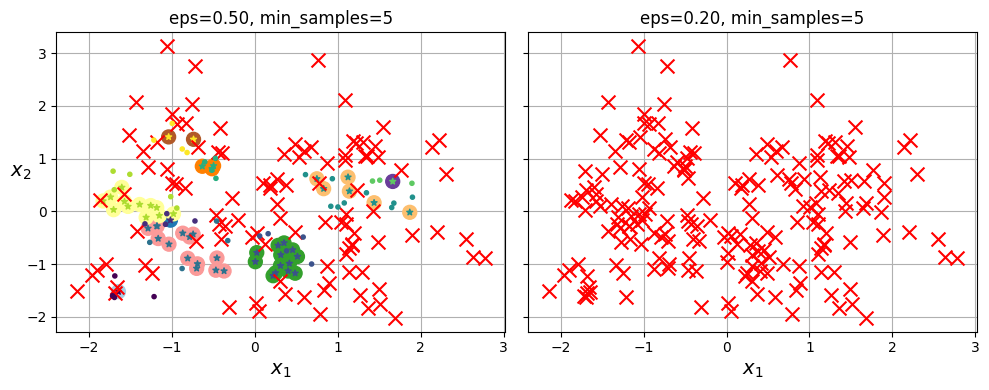

'\nplt.figure(figsize=(9, 3.2))\n\nplt.subplot(121)\nplot_dbscan(dbscan, x_pca_reduced, size=100)\n\nplt.subplot(122)\nplot_dbscan(dbscan2, x_pca_reduced, size=600, show_ylabels=False)\n\nplt.savefig("dbscan_plot")\nplt.show()'

In [86]:
def plot_dbscan(dbscan, x_pca_reduced, size, show_xlabels=True, show_ylabels=True):

    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = x_pca_reduced[anomalies_mask]
    non_cores = x_pca_reduced[non_core_mask]
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title(f"eps={dbscan.eps:.2f}, min_samples={dbscan.min_samples}")
    plt.grid()
    plt.gca().set_axisbelow(True)

dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(x_pca_reduced)
fig,ax=plt.subplots(1,2,figsize=(10,4))
plt.sca(ax[0])
plot_dbscan(dbscan, x_pca_reduced, size=100)
plt.sca(ax[1])
plot_dbscan(dbscan2, x_pca_reduced, size=600, show_ylabels=False)
plt.tight_layout()
plt.show()
'''
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, x_pca_reduced, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, x_pca_reduced, size=600, show_ylabels=False)

plt.savefig("dbscan_plot")
plt.show()'''

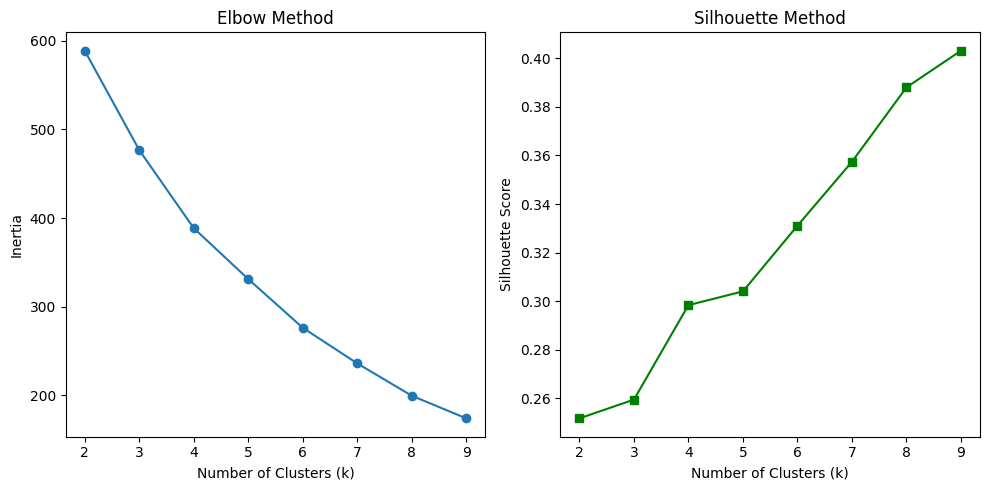

In [87]:
from sklearn.metrics import silhouette_score
inertias=[]
silhouette_scores=[]
k_range=range(2,10)
for k in k_range:
  kmeans=KMeans(n_clusters=k,n_init=10,random_state=42)
  kmeans.fit(x_pca_reduced)
  inertias.append(kmeans.inertia_)
  silhouette_scores.append(silhouette_score(x_pca_reduced,kmeans.labels_))
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.plot(k_range,inertias,marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')


plt.subplot(1,2,2)
plt.plot(k_range,silhouette_scores,marker='s',color='green')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')

plt.tight_layout()
plt.show()


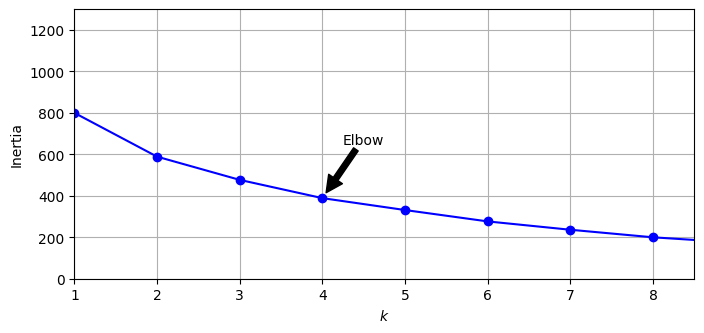

In [88]:

kmeans_per_k = [KMeans(n_clusters=k, n_init=10, random_state=42).fit(x_pca_reduced)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.annotate("", xy=(4, inertias[3]), xytext=(4.45, 650),
             arrowprops=dict(facecolor='black', shrink=0.1))
plt.text(4.5, 650, "Elbow", horizontalalignment="center")
plt.axis([1, 8.5, 0, 1300])
plt.grid()
plt.show()

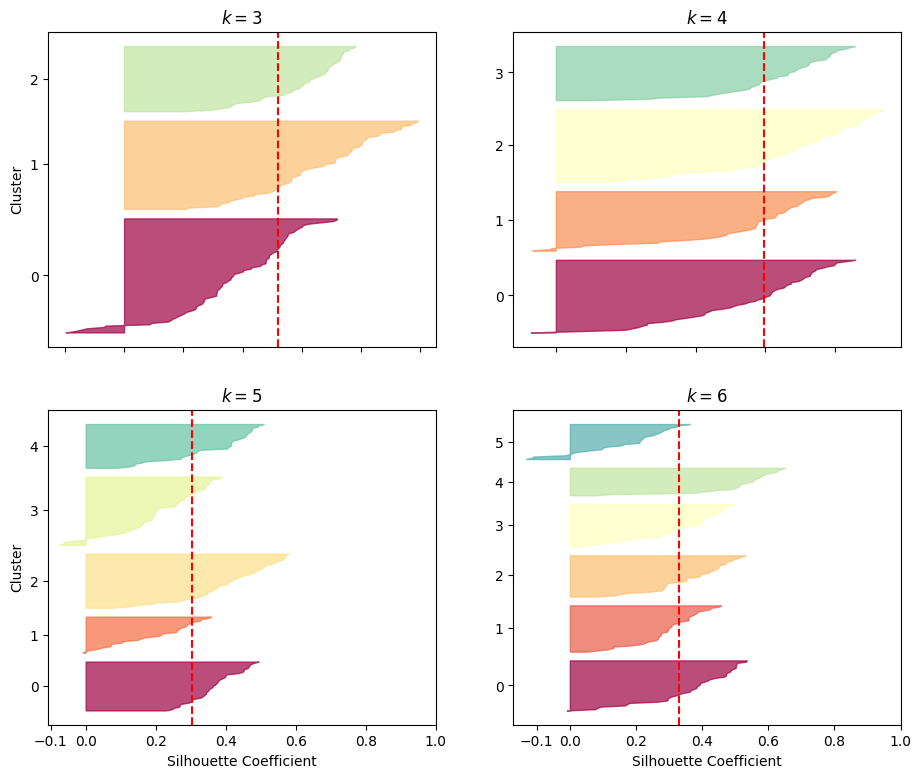

In [89]:

from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)

    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(x_pca_reduced, y_pred)

    padding = len(x_pca_reduced) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = plt.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")

    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title(f"$k={k}$")

plt.show()